<a href="https://colab.research.google.com/github/Parkseojin2001/Deep-learning_with_Python/blob/main/chapter07_working_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.2 케라스 모델을 만드는 여러 방법

### 7.2.1 Sequential 모델

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Sequential 클래스

model = keras.Sequential([
		layers.Dense(64, activation="relu"),
		layers.Dense(10, activation="softmax")
])

In [3]:
# 점진적으로 Sequential 모델 만들기

model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [4]:
# 가중치를 만들기 위해 모델을 호출한다.

model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.03892046, -0.09757067,  0.2660538 , -0.19654539,  0.08814126,
         -0.16563006,  0.18725625,  0.10291255, -0.11780538,  0.09687981,
          0.21320403, -0.00157249,  0.24366689, -0.18816978,  0.01243401,
         -0.08987057,  0.20605981,  0.19151849, -0.01067671, -0.04014063,
          0.26696026,  0.05424559,  0.10028002,  0.00894648,  0.09665409,
         -0.01360673, -0.2077705 ,  0.11185586,  0.09990931,  0.01155522,
          0.16613898, -0.0636148 , -0.04517207,  0.04611334, -0.23780805,
          0.15043932, -0.26049682, -0.02300933, -0.16267543,  0.18264335,
          0.17726853, -0.06164061,  0.2069996 ,  0.2720729 ,  0.2172153 ,
         -0.06142344, -0.20022729,  0.20698965, -0.28568017,  0.17205682,
         -0.0181371 , -0.15662152, -0.28198344, -0.15645991, -0.17325824,
          0.03982764,  0.27258825,  0.1740166 , -0.01551014, -0.16388655,
          0.25544327, -0.04013813, -0.18711

In [5]:
# summary() 메서드

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# name 매개변수로 모델과 층에 이름 지정하기

model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 모델의 입력 크기를 미리 지정하기

model = keras.Sequential()
model.add(keras.Input(shape=(3,))) # 배치 크기가 아니라 각 샘플의 크기이어야 함
model.add(layers.Dense(64, activation="relu"))

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 7.2.2 함수형 API

#### 간단한 예제

In [9]:
# 2개의 Dense 층을 가진 간단한 함수형 모델

inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
# Input 클래스 객체를 정의

inputs = keras.Input(shape=(3,), name="my_input")

In [11]:
inputs.shape

TensorShape([None, 3])

In [12]:
inputs.dtype

tf.float32

In [13]:
features = layers.Dense(64, activation="relu")(inputs)

In [14]:
features.shape

TensorShape([None, 64])

In [15]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_7 (Dense)             (None, 64)                256       
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 다중 입력, 다중 출력 모델

In [17]:
# 다중 입력, 다중 출력 함수형 모델

vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags],
                    outputs=[priority, department])


#### 다중 입력, 다중 출력 모델 훈련하기

In [18]:
import numpy as np

In [19]:
# 입력과 타깃 배열 리스트를 전달하여 모델 훈련하기

num_samples = 1280

# 더미(dummy) 입력 데이터
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# 더미(dummy) 타깃 데이터
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 4ms/step


In [20]:
# 입력과 타깃 배열을 딕션너리로 전달하여 모델 훈련하기

model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department":
                    "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department":
                       ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data,
           "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 5ms/step


#### 함수형 API의 장점: 층 연결 구조 활용하기

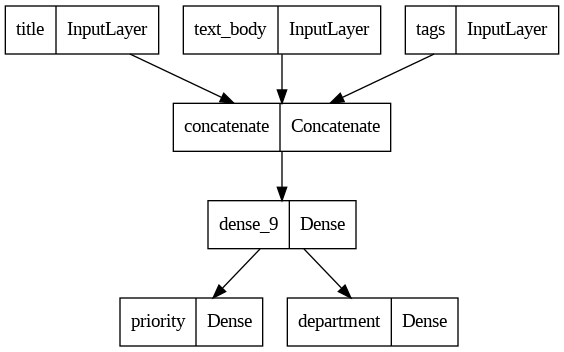

In [21]:
keras.utils.plot_model(model, "ticket_classifier.png")

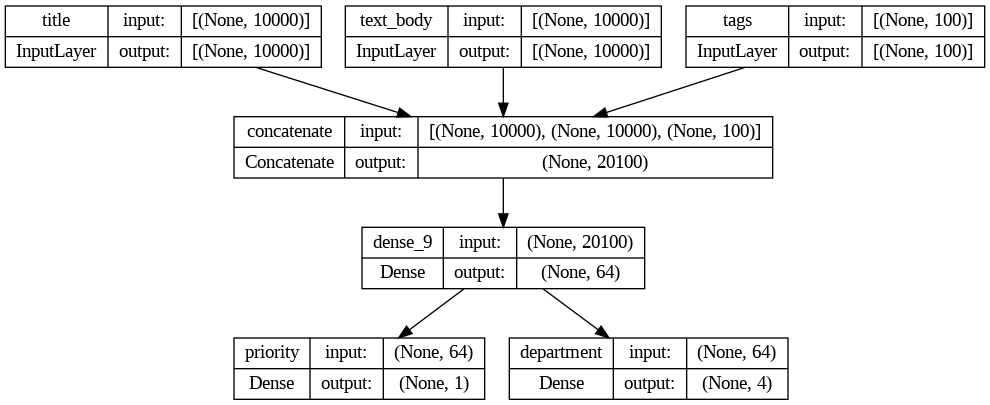

In [22]:
# 모델에 있는 각 층의 입출력 크기 추가

keras.utils.plot_model(
    model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [23]:
# 함수형 모델에 있는 층의 입력과 출력을 출력하기

model.layers

In [24]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [25]:
# 함수형 모델에 있는 층의 입력과 출력을 출력하기

model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [26]:
# 중간층의 출력을 재사용해서 새로운 모델 만들기

features = model.layers[4].output # layers[4]는 중간 Dense 층이다.
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)
new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs = [priority, department, difficulty])

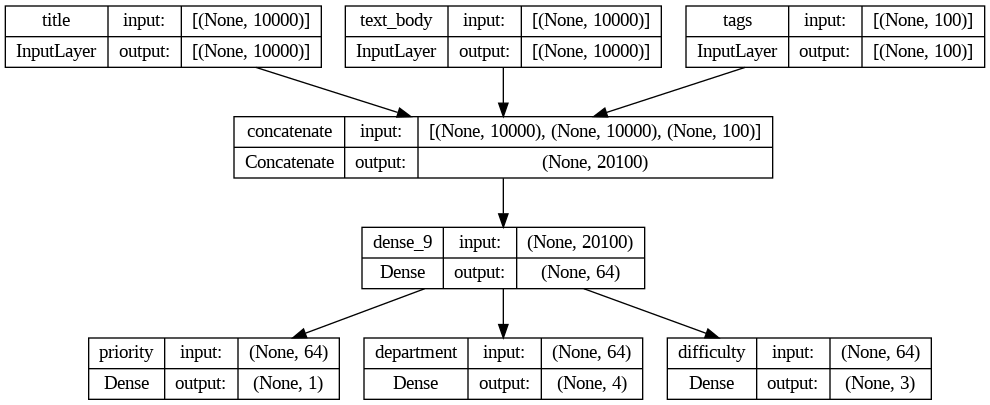

In [27]:
keras.utils.plot_model(
    new_model, "updated_ticket_classifier.png", show_shapes=True)

### 7.2.3 Model 서브클래싱



#### 이전 예제를 서브클래싱 모델로 다시 만들기

In [28]:
# 간단한 서브클래싱 모델

class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    super().__init__()    # 부모 클래스의 생성자를 호출
    self.concat_layer = layers.Concatenate()    # 생성자에서 층을 정의
    self.mixing_layer = layers.Dense(64, activation="relu")
    self.priority_scorer = layers.Dense(1, activation="sigmoid")
    self.department_classifier = layers.Dense(    # 생성자에서 층을 정의
        num_departments, activation="softmax")

  def call(self, inputs):   # call() 메서드에서 정방향 패스를 정의
    title = inputs["title"]
    text_body = inputs["text_body"]
    tags = inputs["tags"]
    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department

In [29]:
# 클래스의 객체 생성

model = CustomerTicketModel(num_departments=4)
priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [30]:
# Model을 상속하여 만든 모델 컴파일 + 훈련

model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_squared_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 4ms/step


### 7.2.4 여러 방식을 혼합하여 사용하기

In [31]:
# 서브클래싱한 모델을 포함하는 함수형 모델 만들기

class Classifier(keras.Model):
  def __init__(self, num_classes=2):
    super().__init__()
    if num_classes == 2:
      num_units = 1
      activation = "sigmoid"
    else:
      num_units = num_classes
      activation = "softmax"
    self.dense = layers.Dense(num_units, activation=activation)
  def call(self, inputs):
    return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [32]:
# 함수형 모델을 포함하는 서브클래싱 모델 만들기

inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
  def __init__(self, num_classes=2):
    super().__init__()
    self.dense = layers.Dense(64, activation="relu")
    self.classifier = binary_classifier
  def call(self, inputs):
    features = self.dense(inputs)
    return self.classifier(features)

model = MyModel()

## 7.3 내장된 훈련 루프와 평가 루프 사용하기

In [33]:
from tensorflow.keras.datasets import mnist

In [34]:
# 표준 워크플로: compile(), fit(), evaluate(), predict()

def get_mnist_model():
		inputs = keras.Input(shape=(28 * 28,))
		features = layers.Dense(512, activation="relu")(inputs)
		features = layers.Dropout(0.5)(features)
		outputs = layers.Dense(10, activation="softmax")(features)
		model = keras.Model(inputs, outputs)
		return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
								loss="sparse_categorical_crossentropy",
								metrics=["accuracy"])
model.fit(train_images, train_labels,
						epochs=3,
						validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
prediction = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 8s 4ms/step - loss: 0.2953 - accuracy: 0.9114 - val_loss: 0.1580 - val_accuracy: 0.9557
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1624 - accuracy: 0.9536 - val_loss: 0.1159 - val_accuracy: 0.9681
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


### 7.3.1 사용자 정의 지표 만들기

In [35]:
import tensorflow as tf

In [36]:
# Metric 클래스를 상속하여 사용자 정의 지표 구현하기

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    # 현재 지표 값 반환
    def result(self):
      return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    # 객체를 생성하지 않고 초기화 -> 지표 객체 하나를 서로 다른 훈련 반복 & 훈련 평가 모두 사용
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [37]:
# 사용자 정의 지표 사용

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 8s 4ms/step - loss: 0.2949 - accuracy: 0.9124 - rmse: 7.1792 - val_loss: 0.1425 - val_accuracy: 0.9586 - val_rmse: 7.3459
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1562 - accuracy: 0.9554 - rmse: 7.3544 - val_loss: 0.1076 - val_accuracy: 0.9706 - val_rmse: 7.4074
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.9749 - rmse: 7.4325


### 7.3.2 콜백 사용하기

#### ModelCheckpoint와 EalyStopping 콜백

In [38]:
# fit() 메서드에서 callbacks 매개변수 사용하기
callbacks_list = [    # fit 메서드의 callbacks 매개변수를 사용하여 콜백 리스트를 모델에 전달
    keras.callbacks.EarlyStopping(  # 성능 향상이 멈추면 stop
        monitor="val_accuracy",   # 모델의 검증 정확도 모니터링
        patience=2,   # 두 번의 에포크 동안 정확도가 상승하지 않으면 훈련 중지
    ),
    keras.callbacks.ModelCheckpoint(  # 매 에포크 끝에서 현재 가중치 저장
        filepath="checkpoint_path.h5",
        monitor="val_loss",
        save_best_only=True, # val_loss가 좋아지지 않으면 모델 파일을 덮어쓰지 않음
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2943 - accuracy: 0.9123 - val_loss: 0.1492 - val_accuracy: 0.9559
Epoch 2/10
  24/1563 [..............................] - ETA: 7s - loss: 0.1698 - accuracy: 0.9505

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 6s 4ms/step - loss: 0.1591 - accuracy: 0.9549 - val_loss: 0.1184 - val_accuracy: 0.9665
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1281 - accuracy: 0.9637 - val_loss: 0.0996 - val_accuracy: 0.9733
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1121 - accuracy: 0.9688 - val_loss: 0.0972 - val_accuracy: 0.9752
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1014 - accuracy: 0.9717 - val_loss: 0.0967 - val_accuracy: 0.9766
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0956 - accuracy: 0.9744 - val_loss: 0.0920 - val_accuracy: 0.9765
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0856 - accuracy: 0.9767 - val_loss: 0.0993 - val_accuracy: 0.9775
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0820 - accuracy: 0.9778 - val_loss: 0.0944 - val_accuracy: 0.9779
Epo

In [39]:
from matplotlib import pyplot as plt

In [40]:
# Callback 클래스를 상속하여 사용자 정의 콜백 만들기

class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs):
    self.per_batch_losses = []
  def on_batch_end(self, batch, logs):
    self.per_batch_losses.append(logs.get("loss"))
  def on_epoch_end(self, epoch, logs):
    plt.clf()
    plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
             label="Training loss for each batch")
    plt.xlabel(f"Batch (epoch {epoch})")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f"plot_at_epoch_{epoch}")
    self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2967 - accuracy: 0.9111 - val_loss: 0.1450 - val_accuracy: 0.9570
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1614 - accuracy: 0.9532 - val_loss: 0.1185 - val_accuracy: 0.9677
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1314 - accuracy: 0.9629 - val_loss: 0.1111 - val_accuracy: 0.9686
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1120 - accuracy: 0.9690 - val_loss: 0.0960 - val_accuracy: 0.9743
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1034 - accuracy: 0.9711 - val_loss: 0.0882 - val_accuracy: 0.9765
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0965 - accuracy: 0.9744 - val_loss: 0.0911 - val_accuracy: 0.9781
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0893 - accuracy: 0.9760 - val_loss: 0.0924 - val_accuracy:

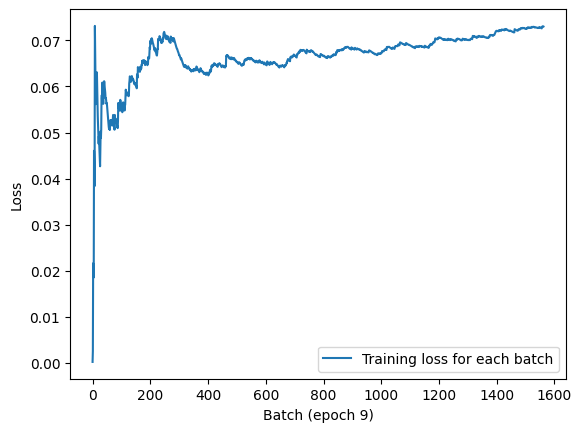

In [41]:
# 콜백 테스트

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

## 7.4 사용자 정의 훈련, 평가 루프 만들기

### 7.4.1 훈련 vs  추론

In [42]:
# 지도 학습을 위한 훈련 스텝

def train_step(inputs, targets):
		with tf.GradientTape() as tape:
				predictions = model(inputs, training=True)
				loss = loss_fn(targets, predictions)
		gradients = tape.gradients(loss, model.trainable_weights)
		optimizer.apply_gradients(zip(model.trainable_weights, gradients))

### 7.4.2 측정 지표의 저수준 사용법

In [43]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"결과: {current_result:.2f}")

결과: 1.00


In [44]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
  mean_tracker.update_state(value)
print(f"평균 지표: {mean_tracker.result():.2f}")

평균 지표: 2.00


### 7.4.3 완전한 훈련과 평가 루프

In [45]:
# 단계별 훈련 루프 작성하기: 훈련 스텝 함수

model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()  # 손실 함수 준비
optimizer = keras.optimizers.RMSprop()   # 옵티마이저 준비
metrics = [keras.metrics.SparseCategoricalAccuracy()] # 모니터링할 지표 리스트 준비
loss_tracking_metric = keras.metrics.Mean()   # 손실 평균을 추적할 평균 지표를 준비

def train_step(inputs, targets):
  with tf.GradientTape() as tape:   # 정방향 패스 실행
    predictions = model(inputs, training=True)
    loss = loss_fn(targets, predictions)
  gradients = tape.gradient(loss, model.trainable_weights)    # 역방향 패스 실행
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))
  logs = {}
  for metric in metrics:    # 측정 지표를 계산
    metric.update_state(targets, predictions)
    logs[metric.name] = metric.result()   # 손실 평균 계산
  loss_tracking_metric.update_state(loss)
  logs["loss"] = loss_tracking_metric.result()
  return logs

In [46]:
# 단계별 훈련 루프 작성하기: 지표 재설정

def reset_metrics():
  for metric in metrics:
    metric.reset_state()
  loss_tracking_metric.reset_state()

In [47]:
# 단계별 훈련 루프 작성하기: 훈련 루프 자체

training_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
  reset_metrics()
  for inputs_batch, targets_batch in training_dataset:
    logs = train_step(inputs_batch, targets_batch)
  print(f"{epoch}번째 에포크 결과")
  for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9139
...loss: 0.2899
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9547
...loss: 0.1556
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9635
...loss: 0.1264


In [48]:
# 단계별 평가 루프 작성하기

def test_step(inputs, targets):
  predictions = model(inputs, training=False)
  loss = loss_fn(targets, predictions)
  logs = {}
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs["val_" + metric.name] = metric.result()
  loss_tracking_metric.update_state(loss)
  logs["val_loss"] = loss_tracking_metric.result()
  return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
  logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
  print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9681
...val_loss: 0.1220


### 7.4.4 tf.function으로 성능 높이기

In [49]:
# 평가 스텝 함수에 @tf.function 데코레이터 추가하기

@tf.function
def test_step(inputs, targets):
  predictions = model(inputs, training=False)
  loss = loss_fn(targets, predictions)

  logs = {}
  for metric in metrics:
    metric.update_state(targets, predictions)
    logs["val_" + metric.name] = metric.result()

  loss_tracking_metric.update_state(loss)
  logs["val_loss"] = loss_tracking_metric.result()
  return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()

for inputs_batch, targets_batch in val_dataset:
  logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
  print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9681
...val_loss: 0.1220


### 7.4.5 fit() 메서드를 사용자 정의 루프로 활용하기

In [50]:
# fit()이 사용할 사용자 정의 훈련 스텝 구현하기

loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")  # 훈련과 평균 과정에서 배치 손실의 평균을 추적

class CustomModel(keras.Model):
  def train_step(self, data):   # train_step 메서드를 오버라이딩
    inputs, targets = data
    with tf.GradientTape() as tape:
      predictions = self(inputs, training=True)   # 모델 = 클래스 자체
      loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, self.trainable_weights)
    self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

    loss_tracker.update_state(loss)   # 손실의 평균을 추적하는 loss_tracker를 업데이트
    return {"loss": loss_tracker.result()}    # 평균 손실 구하기

  @property
  def metrics(self):    # 에포크마다 재설정할 지표 나열
    return [loss_tracker]

In [51]:
# fit() 메서드로 훈련

inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2940
Epoch 2/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1604
Epoch 3/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1313


In [52]:
# compile() 메서드를 통해 지표와 손실 설정

class CustomModel(keras.Model):
  def train_step(self, data):
    inputs, targets = data
    with tf.GradientTape() as tape:
      predictions = self(inputs, training=True)
      loss = self.compiled_loss(targets, predictions)   # self.compiled_metrics 모델 지표 업데이트
    gradients = tape.gradient(loss, self.trainable_weights)
    self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))  # self.compiled_loss를 사용해서 손실 계산
    return {m.name: m.result() for m in self.metrics}   # 측정 지표 이름과 현재 값을 매핑한 딕셔너리 반환

In [53]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2944
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1582
Epoch 3/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1285
